# Detecting fake news

In [3]:
# Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [4]:
# Import data to analyze
true = pd.read_csv('C:/Users/micae/Documents/dataset/news/True.csv')
fake = pd.read_csv('C:/Users/micae/Documents/dataset/news/Fake.csv')

In [5]:
# Set labels to data
true['label'] = 1
fake['label'] = 0
data = pd.concat([true,fake])

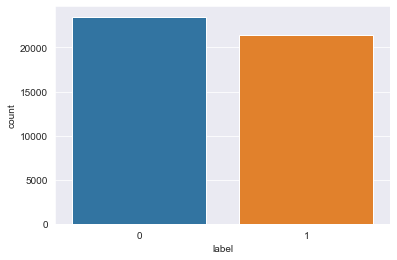

In [6]:
# Take a look at data to check that it's balanced
sns.set_style('darkgrid')
sns.countplot(data['label'])
plt.show()

In [7]:
# Leave text with labels 
data['text'] = data['title'] + " " + data['text']
data = data.drop(['title','subject','date'], axis=1)
data.head()

,text,label
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [8]:
# Splitting data
x_train, x_test, y_train, y_test = train_test_split(data['text'],data['label'],test_size=0.2,random_state = 1)

In [9]:
# Initialize tfidfvectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [10]:
# Fit and transform train set, transform test set
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_text = tfidf_vectorizer.transform(x_test)

In [11]:
# Initialize passiveagressiveclassifier and fit training sets
pa_classifier = PassiveAggressiveClassifier(max_iter = 50)
pa_classifier.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [12]:
# Predict accuracy
y_pred = pa_classifier.predict(tfidf_text)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.51%


In [13]:
# Build confusion matrix
confusion_matrix(y_test,y_pred, labels=[1,0])

array([[4286,   16],
       [  28, 4650]], dtype=int64)

From the confusion matrix we can make the following conclusions:

Our model successfully predicted 4286 positives
Our model successfully predicted 4650 negatives.
Our model predicted 16 false positives
Our model predicted 28 false negatives